In [1]:
import os
import re
from glob import glob
from pathlib import Path

import numpy as np
from astropy.io import fits

from winterdrp_offline.image_operations import (
    median_combine_images,
    merge_channels_into_data,
    normalize_and_median_combine_images,
    split_data_into_channels,
)
from winterdrp_offline.labflats import (
    filter_exposures_with_both_light_and_dark,
    get_dark_frames_for_exposure,
    get_light_frames_for_exposure,
    get_unique_exposures_in_ascending_order,
    load_fits_directory,
    load_light_and_dark_frames,
    parse_filename,
)
from winterdrp_offline.utils import get_table_from_ldac, plot_image, write_image


Combined (light & dark) frames:
    address  dark_photocurrent  exposure_time frame_type  light_photocurrent  \
0        pc                2.6           0.16      light                7.66   
1        pc                2.6           0.10      light                7.66   
2        pc                2.6           0.12      light                7.66   
3        pc                2.6           0.04      light                7.66   
4        pc                2.6           0.16      light                7.66   
..      ...                ...            ...        ...                 ...   
195      pc                2.6           0.14       dark                2.66   
196      pc                2.6           0.08       dark                2.66   
197      pc                2.6           0.10       dark                2.66   
198      pc                2.6           0.14       dark                2.66   
199      pc                2.6           0.14       dark                2.66   

       

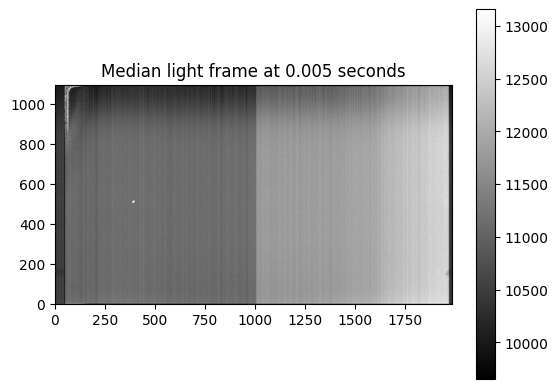

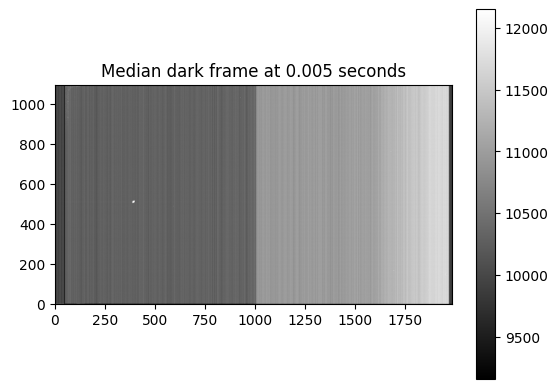

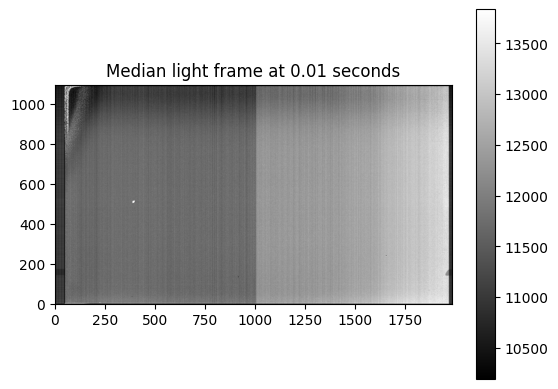

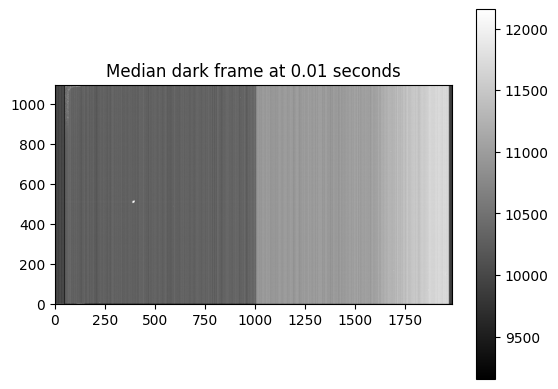

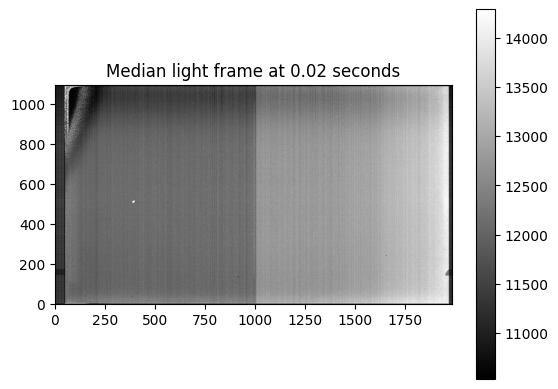

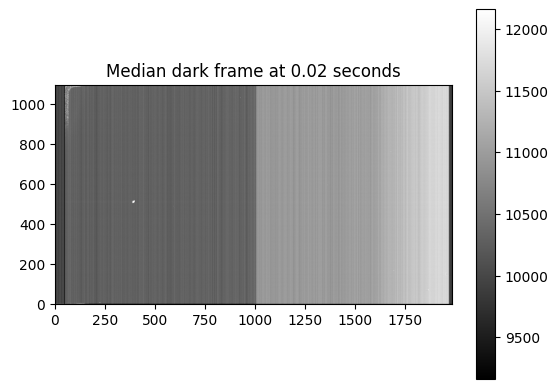

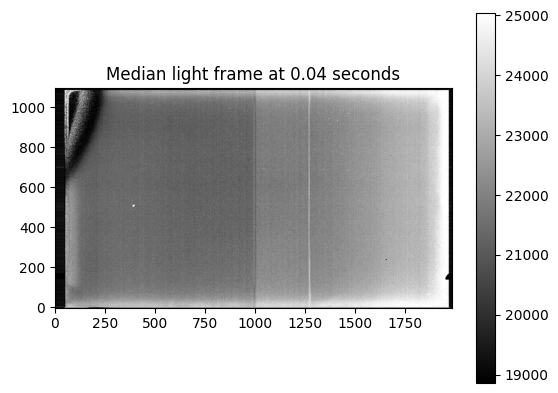

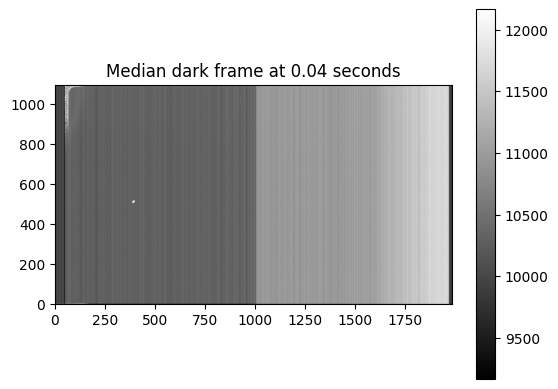

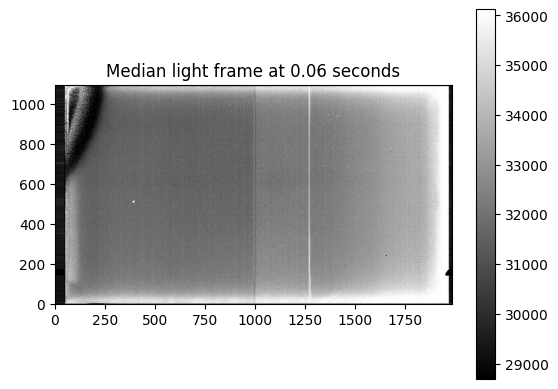

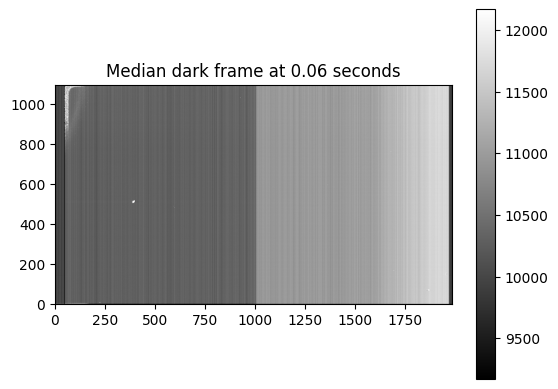

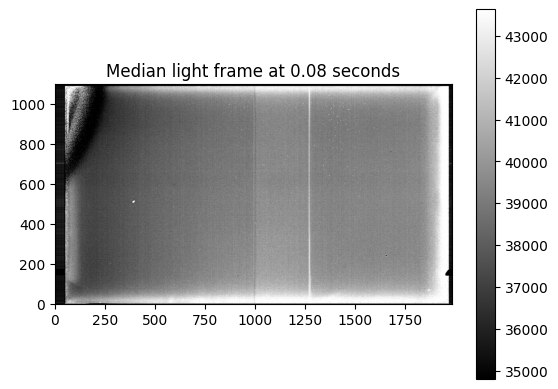

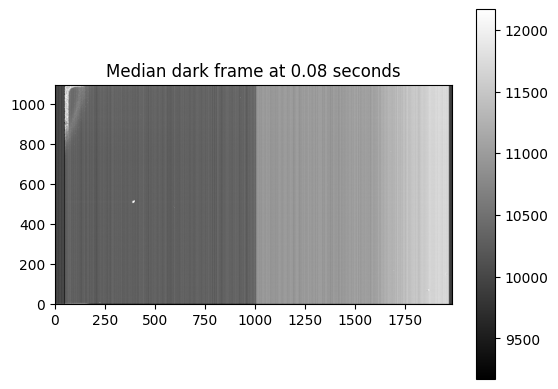

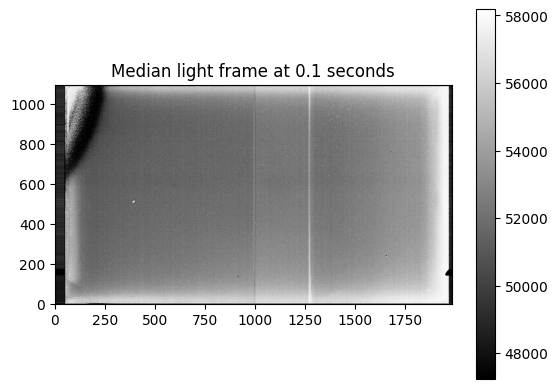

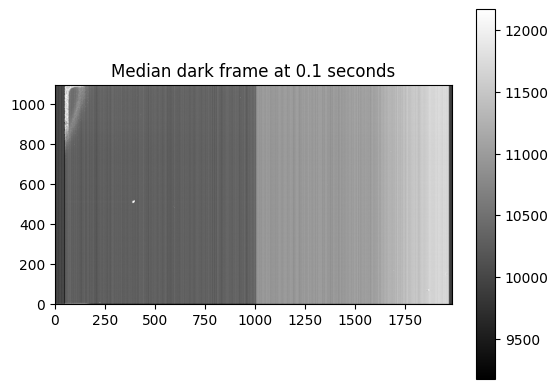

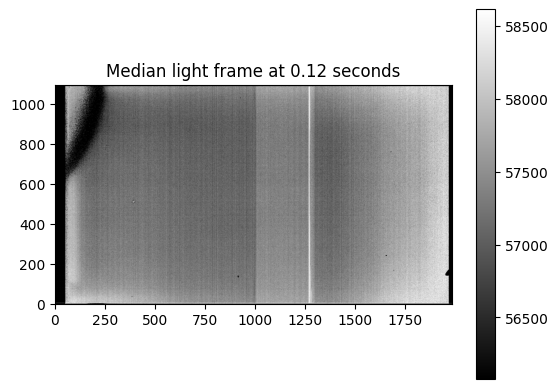

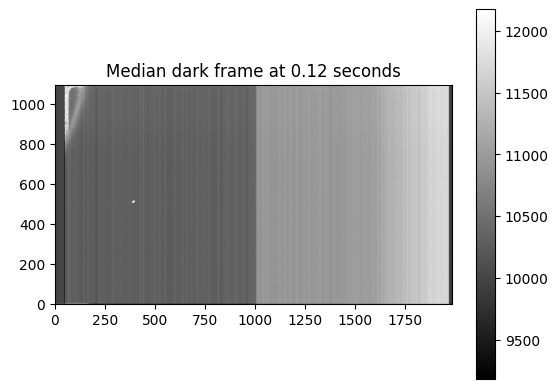

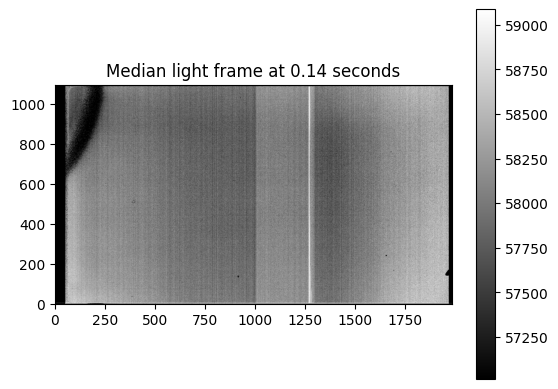

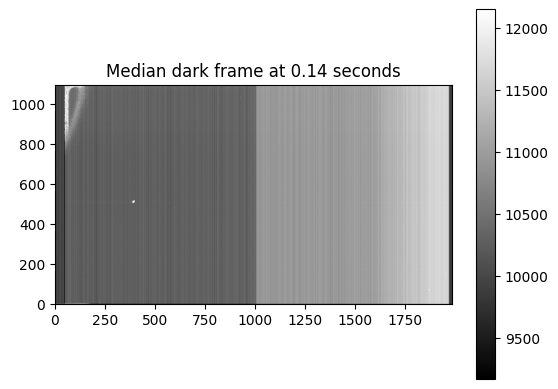

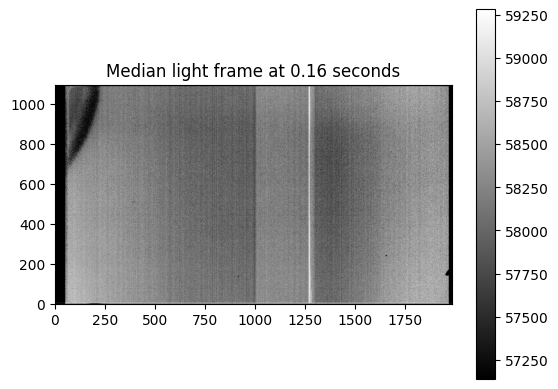

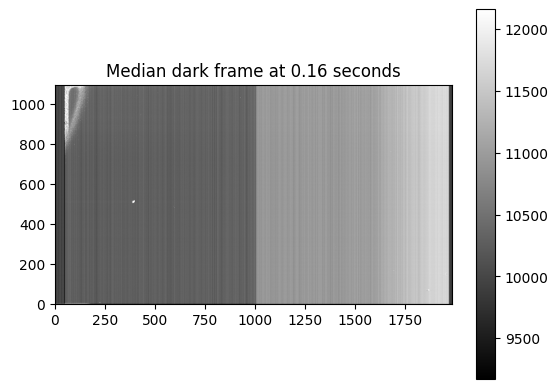

In [ ]:

base_dir = Path(
    os.path.join(
        os.getenv("HOME"), "data", "calibration_hackathon", "hackathon_datasets"
    )
)


flat_dir = base_dir.joinpath(f"flats/lab_flats/pc_2_60nA_post_mods_ptc-coarse")
flat_light_dir = flat_dir.joinpath("flat/raw")
flat_dark_dir = flat_dir.joinpath("dark/raw")

df_all = load_light_and_dark_frames(flat_light_dir, flat_dark_dir)
print("Combined (light & dark) frames:")
print(df_all)
df_filtered = filter_exposures_with_both_light_and_dark(df_all)
print("\nFiltered to exposures with both light and dark frames:")
print(df_filtered)

exposures_sorted = get_unique_exposures_in_ascending_order(df_filtered)
print("\nUnique exposures in ascending order (that have both light and dark):")
print(exposures_sorted)

# now go through each exposure time and get the light and dark frames, and make the median combined light and dark frames
for exp_time in exposures_sorted:
    # Example of retrieving specific frames:
    print(f"\nLight frames at exposure_time={exp_time}:")
    light_frames = get_light_frames_for_exposure(df_filtered, exp_time)
    dark_frames = get_dark_frames_for_exposure(df_filtered, exp_time)

    median_light_frame = median_combine_images(light_frames["filepath"])
    median_dark_frame = median_combine_images(dark_frames["filepath"])

    # plot the median light and dark frames
    #ax = plot_image(median_light_frame)
    #ax.set_title(f"Median light frame at {exp_time} seconds")
    #ax = plot_image(median_dark_frame)
    #ax.set_title(f"Median dark frame at {exp_time} seconds")

    